In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install feature_engine
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

^C
ERROR: Operation cancelled by user
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [261]:
import plotly.express as px

# Data Wrangling

In [262]:
master_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
data = master_data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [263]:
data.shape

(8693, 14)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [265]:
data[["Cabin_deck","Cabin_no.","Cabin_side"]]=data["Cabin"].str.split("/",expand=True)
data.drop(columns=["Cabin"],inplace=True)

data[["firstname","last_name"]]=data["Name"].str.split(" ",expand=True)
data.drop(columns=["Name"],inplace=True)

data[["Passenger_group","Passennger_no._in_group"]]=data["PassengerId"].str.split("_",expand=True)
#dropinng passengerId as we have seperated the information in two column we dont need it..
data.drop(columns=["PassengerId"],inplace=True)

data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,Passenger_group,Passennger_no._in_group
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Willy,Santantines,0004,01


In [266]:
data.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                        179
VIP                        203
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

In [267]:
px.imshow(data.isnull().T,color_continuous_scale=px.colors.sequential.Blackbody)

<AxesSubplot:>

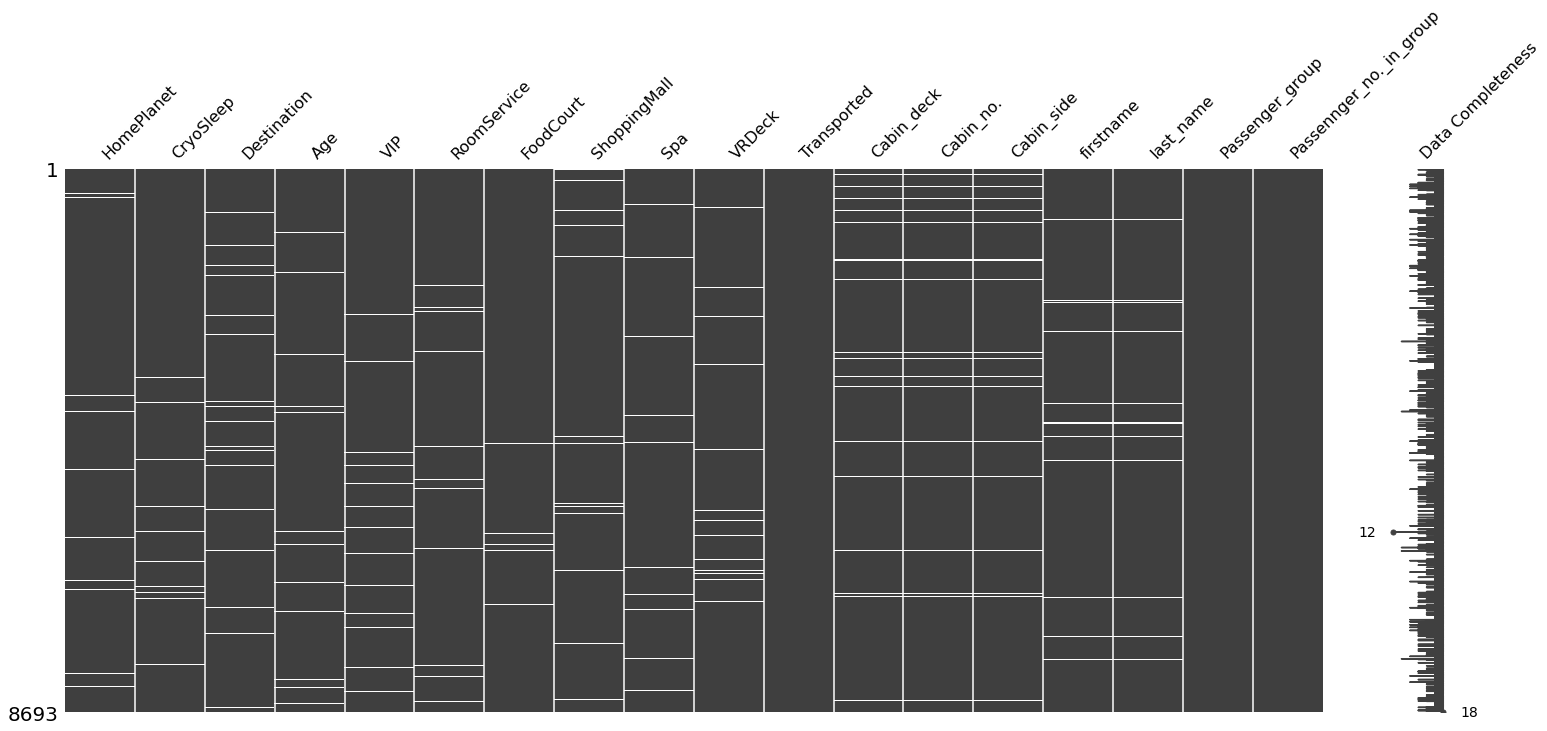

In [268]:
import missingno as msno

msno.matrix(data,labels = True)

In [269]:
temp=data.copy()

In [270]:
print(data.shape)
print(temp.shape)

(8693, 18)
(8693, 18)


In [271]:
print(data['HomePlanet'].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [272]:
print(data['CryoSleep'].value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [273]:
print(data['Cabin_deck'].value_counts())

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64


In [274]:
data.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                        179
VIP                        203
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

In [275]:
from feature_engine.imputation import CategoricalImputer

mode_imputer= CategoricalImputer(imputation_method="frequent",
variables=[
    'HomePlanet',
     'CryoSleep',
     'Destination',
     'VIP',
     'Cabin_deck',
     #'Cabin_no.',
     'Cabin_side',
     'firstname',
    'last_name'])

mode_imputer.fit(data)
print(mode_imputer.imputer_dict_)
data=mode_imputer.transform(data)

{'HomePlanet': 'Earth', 'CryoSleep': False, 'Destination': 'TRAPPIST-1e', 'VIP': False, 'Cabin_deck': 'F', 'Cabin_side': 'S', 'firstname': 'Idace', 'last_name': 'Casonston'}


In [276]:
data['Cabin_no.'] = pd.to_numeric(data['Cabin_no.'])

In [277]:
data['CryoSleep'] = data['CryoSleep'].astype(int)

In [278]:
data['VIP'] = data['VIP'].astype(int)

In [279]:
data['Transported'] = data['Transported'].astype(int)

In [280]:
data.dtypes

HomePlanet                  object
CryoSleep                    int64
Destination                 object
Age                        float64
VIP                          int64
RoomService                float64
FoodCourt                  float64
ShoppingMall               float64
Spa                        float64
VRDeck                     float64
Transported                  int64
Cabin_deck                  object
Cabin_no.                  float64
Cabin_side                  object
firstname                   object
last_name                   object
Passenger_group             object
Passennger_no._in_group     object
dtype: object

In [281]:
data.isna().sum()
#data.info()

HomePlanet                   0
CryoSleep                    0
Destination                  0
Age                        179
VIP                          0
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Transported                  0
Cabin_deck                   0
Cabin_no.                  199
Cabin_side                   0
firstname                    0
last_name                    0
Passenger_group              0
Passennger_no._in_group      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

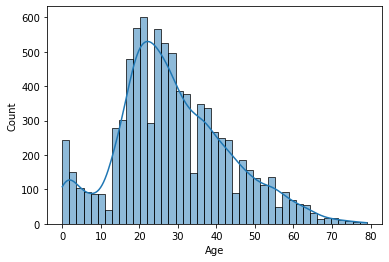

In [282]:
import seaborn as sns

sns.histplot(data.Age, kde=True)

In [283]:
skewValue = data.skew(axis=0)
skewValue

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CryoSleep                   0.632024
Age                         0.419097
VIP                         6.381293
RoomService                 6.333014
FoodCourt                   7.102228
ShoppingMall               12.627562
Spa                         7.636020
VRDeck                      7.819732
Transported                -0.014497
Cabin_no.                   0.718360
Passenger_group             0.002020
Passennger_no._in_group     2.746617
dtype: float64

In [284]:
data.dtypes

HomePlanet                  object
CryoSleep                    int64
Destination                 object
Age                        float64
VIP                          int64
RoomService                float64
FoodCourt                  float64
ShoppingMall               float64
Spa                        float64
VRDeck                     float64
Transported                  int64
Cabin_deck                  object
Cabin_no.                  float64
Cabin_side                  object
firstname                   object
last_name                   object
Passenger_group             object
Passennger_no._in_group     object
dtype: object

In [285]:
from feature_engine.imputation import MeanMedianImputer

median_imputer = MeanMedianImputer(imputation_method="median",variables=["Age",
                                                                        "RoomService",
                                                                        "FoodCourt",
                                                                        "ShoppingMall",
                                                                        "Spa",
                                                                        "VRDeck",
                                                                        "Cabin_no."])

median_imputer.fit(data)
print(median_imputer.imputer_dict_)
data = median_imputer.transform(data)

{'Age': 27.0, 'RoomService': 0.0, 'FoodCourt': 0.0, 'ShoppingMall': 0.0, 'Spa': 0.0, 'VRDeck': 0.0, 'Cabin_no.': 427.0}


In [286]:
data.isna().sum()

HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
Cabin_deck                 0
Cabin_no.                  0
Cabin_side                 0
firstname                  0
last_name                  0
Passenger_group            0
Passennger_no._in_group    0
dtype: int64

In [287]:
data.dtypes

HomePlanet                  object
CryoSleep                    int64
Destination                 object
Age                        float64
VIP                          int64
RoomService                float64
FoodCourt                  float64
ShoppingMall               float64
Spa                        float64
VRDeck                     float64
Transported                  int64
Cabin_deck                  object
Cabin_no.                  float64
Cabin_side                  object
firstname                   object
last_name                   object
Passenger_group             object
Passennger_no._in_group     object
dtype: object

# One Hot Encoding

In [288]:
data['Passenger_group'] = pd.to_numeric(data['Passenger_group'])
data['Passennger_no._in_group'] = pd.to_numeric(data['Passennger_no._in_group'])
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,Passenger_group,Passennger_no._in_group
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P,Maham,Ofracculy,1,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S,Juanna,Vines,2,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S,Altark,Susent,3,1
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S,Solam,Susent,3,2
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S,Willy,Santantines,4,1


In [289]:
temp=data.drop(['Transported', 'firstname', 'last_name'], axis=1)

print("columns before one hot encoding", data.shape[1])
temp=pd.get_dummies(temp)

#dummies_frame = pd.get_dummies(X_data)
#X_submit=X_submit.reindex(columns = dummies_frame.columns, fill_value=0)
#X_test=pd.get_dummies(X_test)

conc = pd.concat([temp, data[['firstname', 'last_name', 'Transported']]], axis="columns")
print("columns after one hot encoding", conc.shape[1])

data = conc
#conc.columns
#print(data.dtypes)
data.head()

columns before one hot encoding 18
columns after one hot encoding 30


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_no.,Passenger_group,...,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,firstname,last_name,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,Maham,Ofracculy,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,2,...,0,0,1,0,0,0,1,Juanna,Vines,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,3,...,0,0,0,0,0,0,1,Altark,Susent,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,3,...,0,0,0,0,0,0,1,Solam,Susent,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,4,...,0,0,1,0,0,0,1,Willy,Santantines,1


In [290]:
data.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Cabin_no.                    float64
Passenger_group                int64
Passennger_no._in_group        int64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Cabin_deck_A                   uint8
Cabin_deck_B                   uint8
Cabin_deck_C                   uint8
Cabin_deck_D                   uint8
Cabin_deck_E                   uint8
Cabin_deck_F                   uint8
Cabin_deck_G                   uint8
Cabin_deck_T                   uint8
Cabin_side_P                   uint8
Cabin_side_S                   uint8
f

### Dropping firstname, last_name columns

In [291]:
data = data.drop(['firstname', 'last_name'], axis=1)
data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin_no.', 'Passenger_group',
       'Passennger_no._in_group', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P',
       'Cabin_side_S', 'Transported'],
      dtype='object')

# Outliers

In [292]:
from scipy.stats import zscore

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool', 'uint8']

temp = data.select_dtypes(include=numerics)
temp=temp.apply(zscore)

temp[(abs(temp) > 3).any(axis=1)]

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_no.,Passenger_group,...,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,Transported
0,-0.732770,0.711945,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.177238,-1.734409,...,3.187347,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,-1.007274
2,-0.732770,2.036857,6.533255,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.177238,-1.733660,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,-0.968181,0.968181,-1.007274
3,-0.732770,0.293552,-0.153063,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.177238,-1.733660,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,-0.968181,0.968181,-1.007274
5,-0.732770,1.060606,-0.153063,-0.333105,0.021662,-0.283579,-0.012074,-0.263003,-1.177238,-1.732911,...,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,1.032865,-1.032865,0.992779
9,1.364685,-1.031359,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.175264,-1.731788,...,3.187347,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,0.992779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,-0.732770,-2.007610,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.985769,1.737861,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,0.992779
8686,-0.732770,0.223820,-0.153063,-0.331591,0.437154,-0.283579,-0.226201,-0.233023,-0.985769,1.737861,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,-1.007274
8687,-0.732770,0.084356,-0.153063,-0.333105,1.729378,-0.283579,-0.268849,0.027986,-0.985769,1.737861,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,0.992779
8688,-0.732770,0.851410,6.533255,-0.333105,3.992336,-0.283579,1.189173,-0.197751,-0.983795,1.738236,...,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-1.032865,-1.007274


# Feature Selection

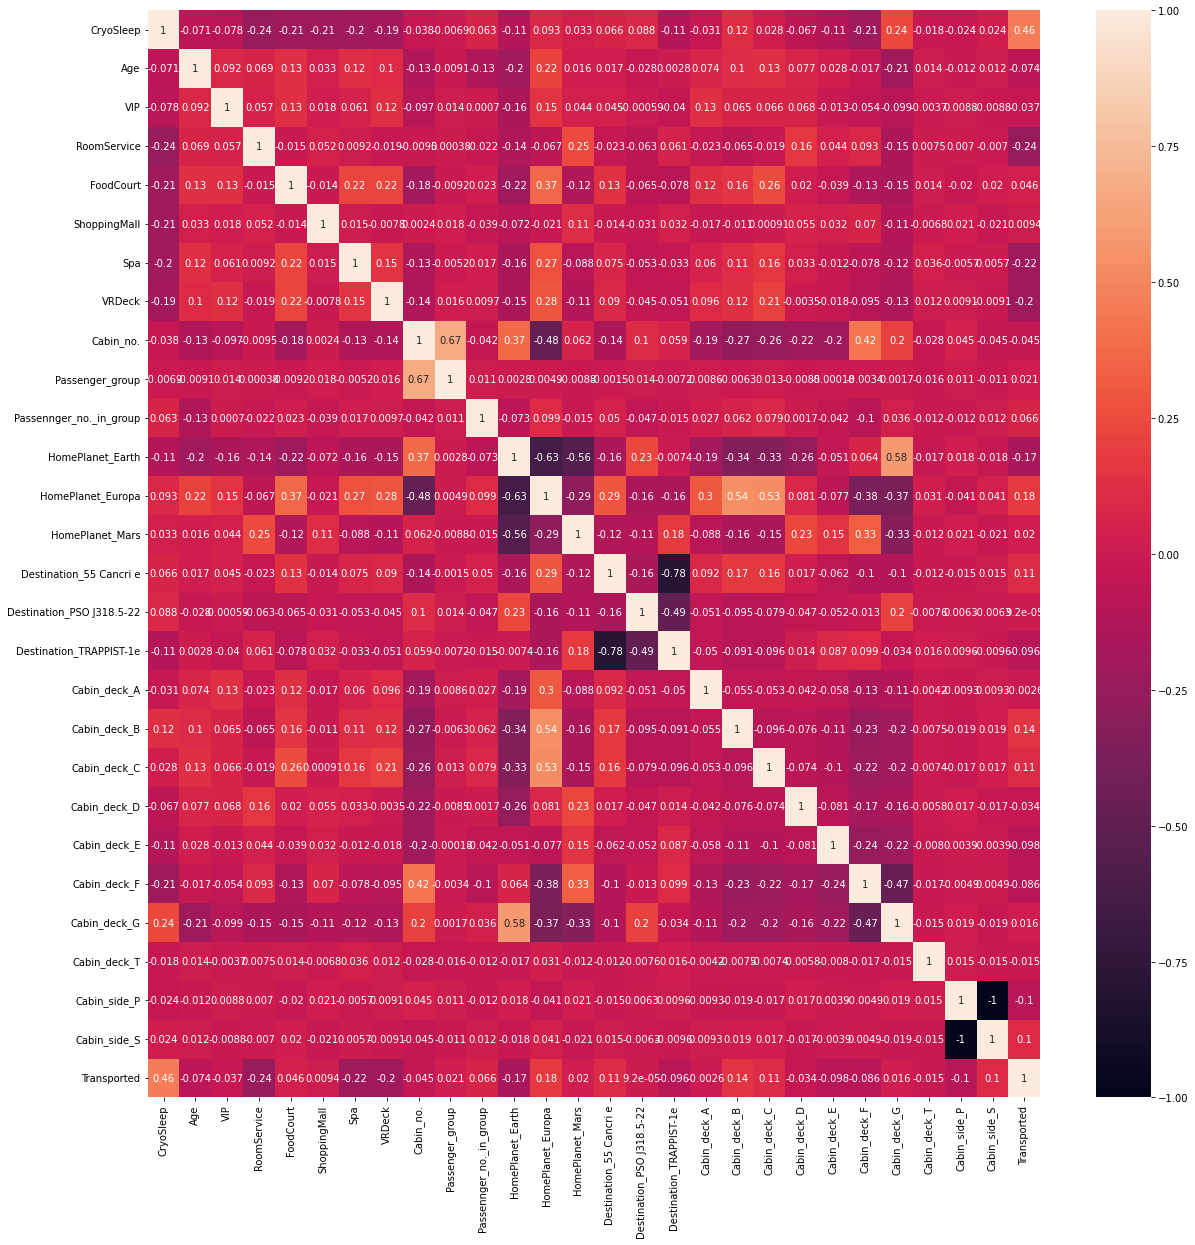

In [293]:
#import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data.corr(), annot=True)

In [294]:
X_data = data
X_data = X_data.drop(['Transported'], axis=1)
X_data.head(2)
y_data=data['Transported']
X_data.head(2)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_no.,Passenger_group,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,2,...,0,0,0,0,0,1,0,0,0,1


## Variance treshold

we want to remove all features that are either one or zero (on or off) in more than 80% of the samples

In [295]:
from sklearn.feature_selection import VarianceThreshold

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool', 'uint8']
temp = data.select_dtypes(include=numerics)
print("numerical columns in original data: ",temp.shape[1])

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(temp)

print("numerical columns after applying variance threshold: ",temp.shape[1])

numerical columns in original data:  28
numerical columns after applying variance threshold:  28


so all columns meet variance treshold

## Univariate feature selection

In [296]:
X_data.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Cabin_no.                    float64
Passenger_group                int64
Passennger_no._in_group        int64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Cabin_deck_A                   uint8
Cabin_deck_B                   uint8
Cabin_deck_C                   uint8
Cabin_deck_D                   uint8
Cabin_deck_E                   uint8
Cabin_deck_F                   uint8
Cabin_deck_G                   uint8
Cabin_deck_T                   uint8
Cabin_side_P                   uint8
Cabin_side_S                   uint8
d

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log10



<Figure size 432x288 with 0 Axes>

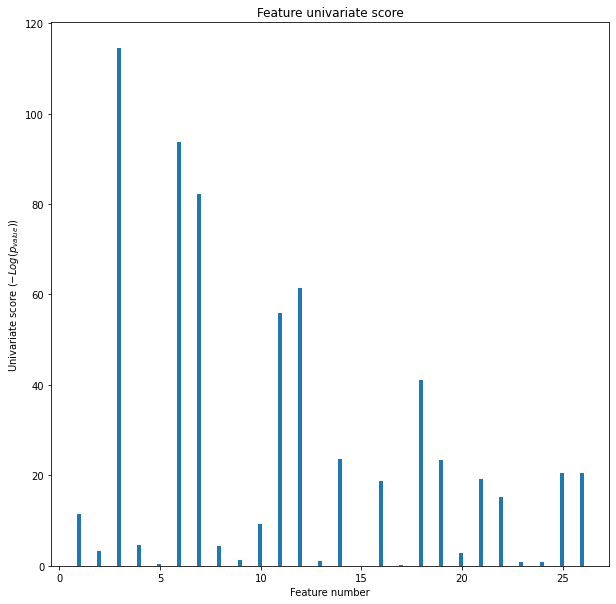

In [297]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=6)
selector.fit(X_data, y_data)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

import matplotlib.pyplot as plt

X_indices = np.arange(X_data.shape[-1])
plt.figure(1)
plt.figure(figsize=(10, 10))
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [298]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_data = SelectKBest(chi2, k=6).fit_transform(X_data, y_data)
X_data.shape

(8693, 6)

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
#X_scaled_submit = scaler.transform(X_submit)
X_data

array([[-0.33310466, -0.28102673, -0.2706259 , -0.26300329, -1.17723796,
        -1.73440885],
       [-0.16807343, -0.27538657,  0.21715825, -0.22420468, -1.17723796,
        -1.73403444],
       [-0.2680006 ,  1.95999765,  5.69562289, -0.21979574, -1.17723796,
        -1.73366003],
       ...,
       [-0.33310466, -0.28102673, -0.26973741, -0.26300329,  1.78362735,
         1.73935882],
       [-0.33310466,  0.37636549,  0.04301309,  2.58957649,  0.02289945,
         1.73973323],
       [-0.14233462,  2.656871  , -0.2706259 , -0.25242185,  0.02289945,
         1.73973323]])

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

print("shape of training data", X_train.shape)
print("shape of testing data", X_test.shape)

shape of training data (5824, 6)
shape of testing data (2869, 6)


In [316]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 10))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not transported', 'transported']); ax.yaxis.set_ticklabels(['not transported', 'transported'])

# Logistic Regression

In [303]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.777301904475606


In [306]:
logreg_cv.score(X_test,y_test)

0.7696061345416522

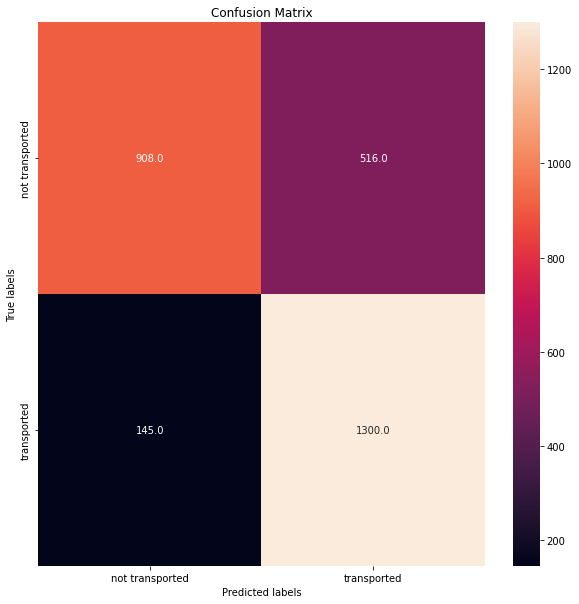

In [317]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)